In [1]:
import praclib as plb # type: ignore
import  praclibdecorators as pdec # type: ignore
from functools import reduce

# Информация

Реализованная сложность: <font color="Crimson">**6**

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**6 пунктов — сложность 2**


6.	С помощью данных функций реализовать и визуализировать:

* фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

<font color="Crimson">**3 пункта — сложность 1**

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**5 пунктов — сложность 1**

8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**5 пунктов — сложность 2**


## Разделы: <a class="anchor" id="anchor"></a>

* [Generations](#Gens)
* [For map()](#map())
* [Filters](#filters)
* [For functools.reduce()](#functools.reduce())
* [solving tasks](#Tasks)


# Gens

<Axes: >

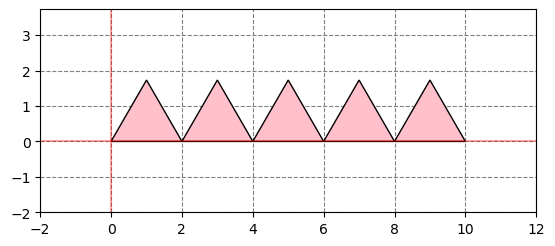

In [45]:
plb.draw_field(plb.gen_triangle(5),color='pink',figdpi=100, enlarge=2)

<Axes: >

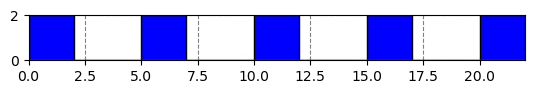

In [3]:
plb.draw_field(plb.gen_rectangle(5,mezhdu=3),color='b')

<Axes: >

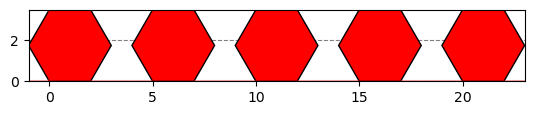

In [4]:
plb.draw_field(plb.gen_hexagon(5,mezhdu=1),color='r')

# map()

## Перенос

<Axes: >

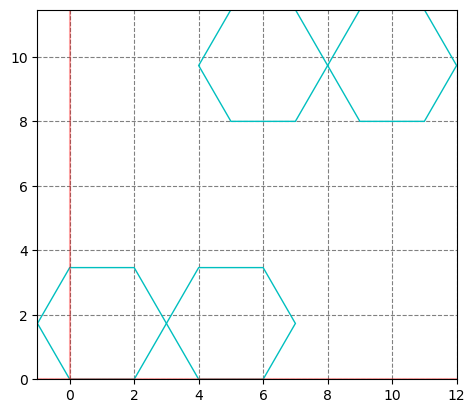

In [5]:
plb.draw_field(map(lambda x: plb.tr_translate(x,5,8),plb.gen_hexagon(2)),plb.gen_hexagon(2), ecolor = 'c')

<Axes: >

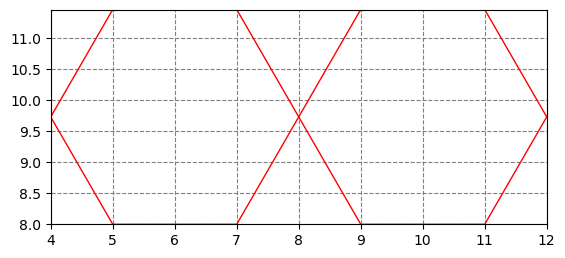

In [6]:
draw_translate = pdec.tr_translate(plb.draw_field, 5, 8)

draw_translate(plb.gen_hexagon(2), ecolor = 'r')

## Поворот

<Axes: >

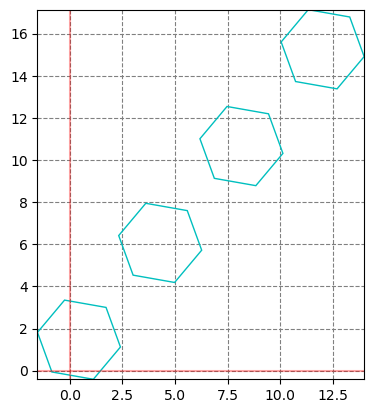

In [7]:
plb.draw_field(map(lambda x: plb.tr_rotate(x,50,(1,1)),plb.gen_hexagon(4,mezhdu=2)),ecolor='c')    

<Axes: >

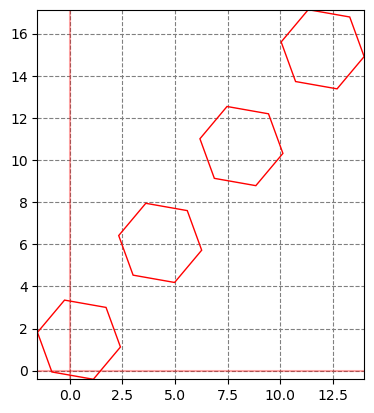

In [8]:
draw_rotate = pdec.tr_rotate(plb.draw_field,50,(1,1))

draw_rotate(plb.gen_hexagon(4,mezhdu=2),ecolor='r')

## Гомотетия

<Axes: >

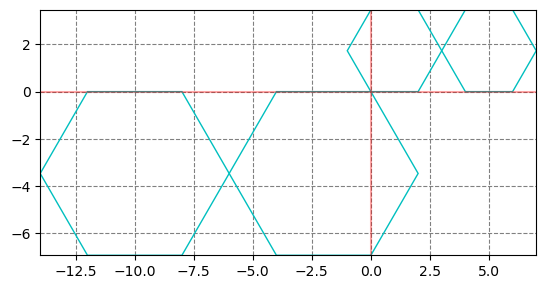

In [9]:
plb.draw_field(map(lambda x: plb.tr_homothety(x,-2),plb.gen_hexagon(2)), plb.gen_hexagon(2),ecolor='c')

<Axes: >

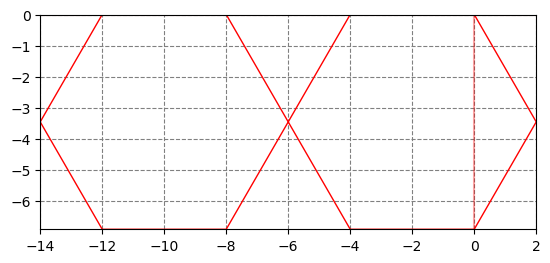

In [10]:
draw_hom = pdec.tr_homothety(plb.draw_field,-2)

draw_hom(plb.gen_hexagon(2),ecolor='r')

## Симметрия относительно прямой $y = bx+k$

<Axes: >

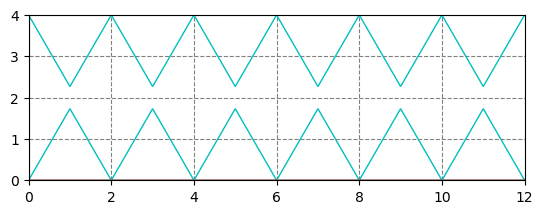

In [11]:
plb.draw_field(map(lambda x: plb.tr_symmetry(x,0,2),plb.gen_triangle(6)),plb.gen_triangle(6), ecolor='c')   

<Axes: >

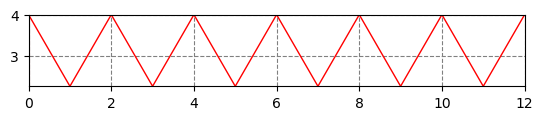

In [12]:
draw_sym = pdec.tr_symmetry(plb.draw_field,0,2)

draw_sym(plb.gen_triangle(6),ecolor='r')

# filters

<Axes: >

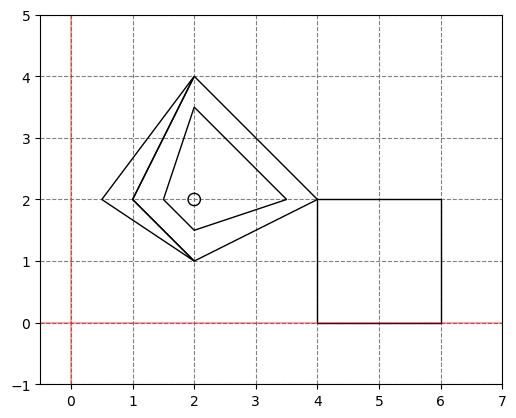

In [13]:
objec1 = [((2,1),(4,2),(2,4),(1,2))]
objec2 = [((2,1),(0.5,2),(2,4),(1,2))]
objec3=[((4, 0), (6, 0), (6, 2), (4, 2))]
objec4=[((2,1.5),(3.5,2),(2,3.5),(1.5,2))]
dot = [((2,2),)]
objec = objec1+objec2+objec3+objec4
plb.draw_field(objec1+objec2+objec3+objec4+dot,enlarge=1)

## flt_convex_polygon

<Axes: >

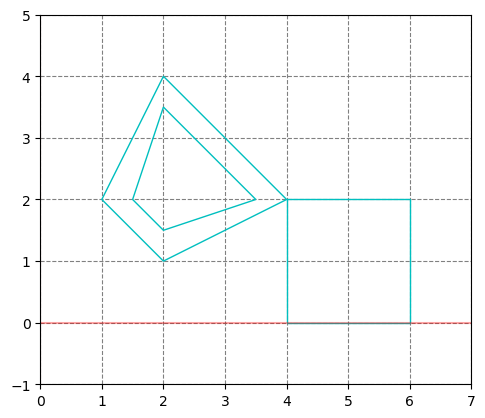

In [14]:
plb.draw_field(list(filter(plb.flt_convex_polygon,objec)),ecolor='c',enlarge=1)

<Axes: >

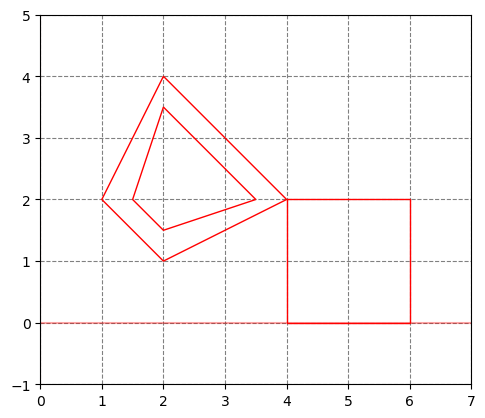

In [15]:
draw_convex = pdec.flt_convex_polygon(plb.draw_field)

draw_convex(objec,ecolor='r',enlarge=1)

## flt_angle_point

<Axes: >

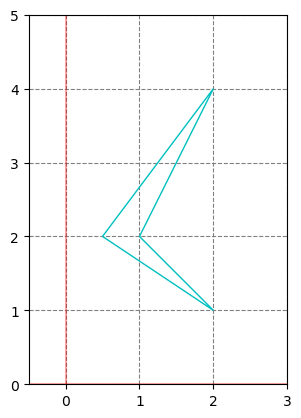

In [16]:
plb.draw_field(list(filter(lambda x:plb.flt_angle_point(x,(0.5,2)),objec)),ecolor='c',enlarge=1)

<Axes: >

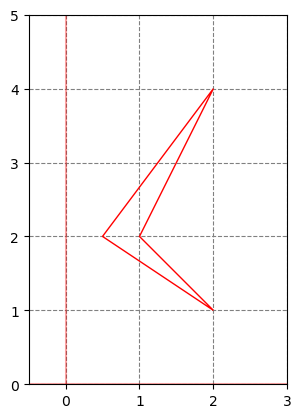

In [17]:
draw_anpo = pdec.flt_angle_point(plb.draw_field,(0.5,2))

draw_anpo(objec,ecolor='r',enlarge=1)

## flt_square

<Axes: >

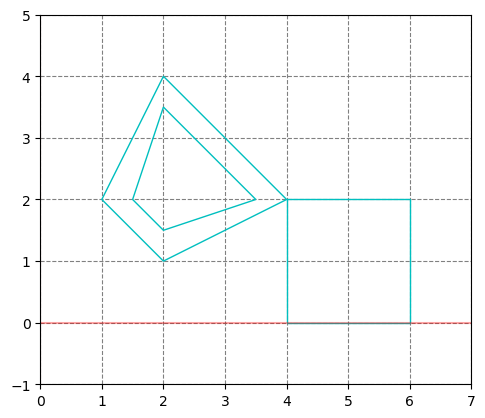

In [18]:
plb.draw_field(list(filter(lambda x:plb.flt_square(x,0.75),objec)),ecolor='c',enlarge=1)

<Axes: >

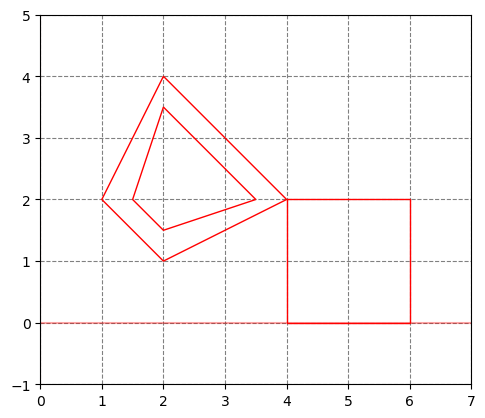

In [19]:
draw_square = pdec.flt_square(plb.draw_field,0.75)

draw_square(objec,ecolor='r',enlarge=1)

## flt_short_side
Проверяет, имееет ли фигура кратчайшую cторону меньше заданной

<Axes: >

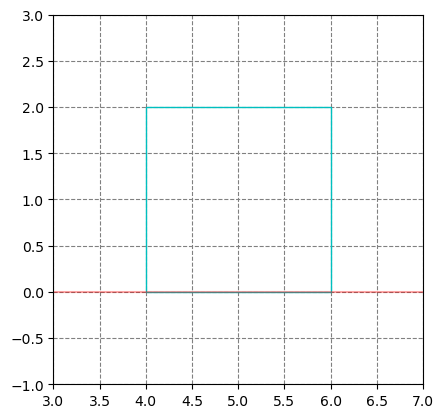

In [20]:
plb.draw_field(list(filter(lambda x:plb.flt_short_side(x,1.5),objec)),ecolor='c',enlarge=1)

<Axes: >

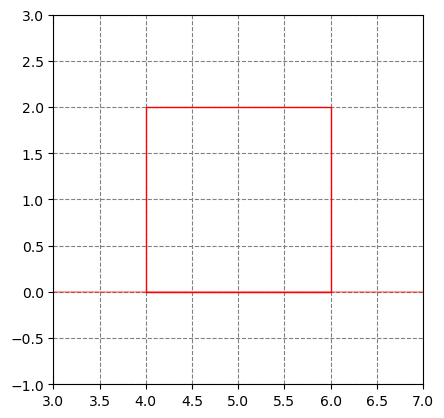

In [21]:
draw_shsi = pdec.flt_short_side(plb.draw_field,1.5)

draw_shsi(objec,ecolor='r',enlarge=1)

## flt_point_inside

<Axes: >

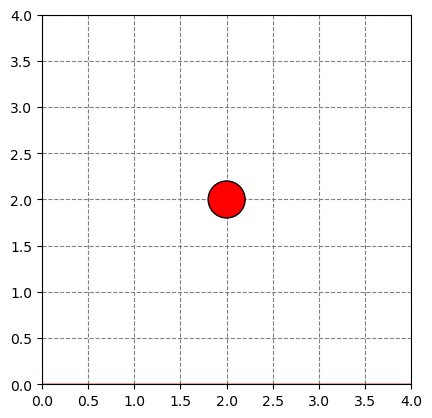

In [22]:
plb.draw_field(dot,color='r',radius=0.2, enlarge = 2)

<Axes: >

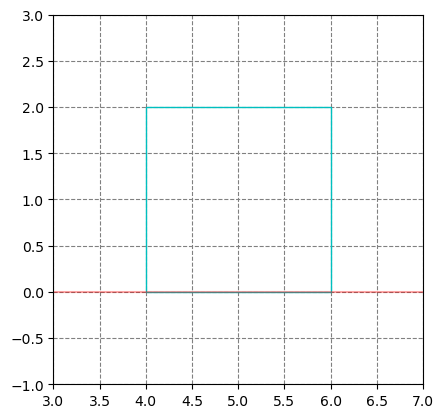

In [23]:
plb.draw_field(list(filter(lambda x:plb.flt_point_inside(x,(2,2)),objec)),ecolor='c',enlarge=1)

<Axes: >

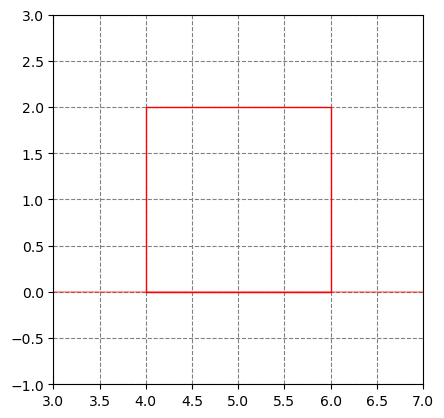

In [24]:
draw_pins = pdec.flt_point_inside(plb.draw_field,(2,2))

draw_pins(objec,ecolor='r',enlarge=1)

## flt_polygon_angles_inside

<Axes: >

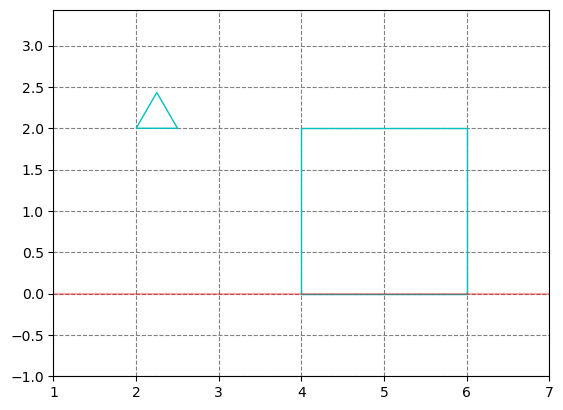

In [25]:
plb.draw_field(list(filter(lambda x:plb.flt_polygon_angles_inside(x,(plb.triangle_cors(2,2,0.5))),objec)),[plb.triangle_cors(2,2,0.5)],ecolor='c',enlarge=1)

<Axes: >

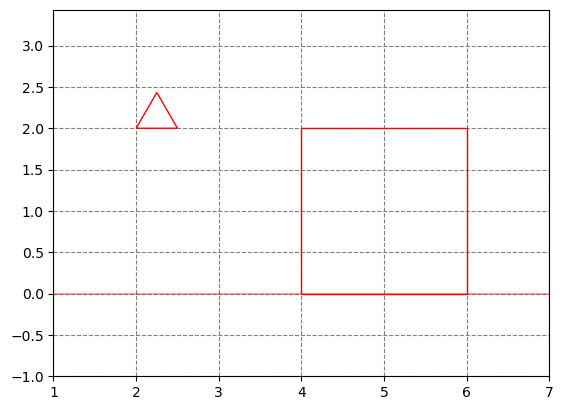

In [26]:
draw_pangls = pdec.flt_polygon_angles_inside(plb.draw_field,(plb.triangle_cors(2,2,0.5)))

draw_pangls(objec,[plb.triangle_cors(2,2,0.5)],ecolor='r',enlarge=1)

# functools.reduce()

<Axes: >

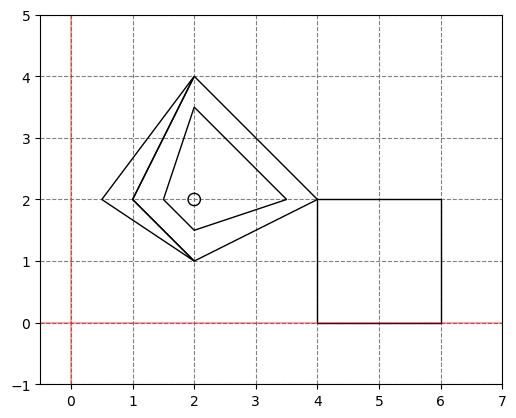

In [27]:
objec1 = [((2,1),(4,2),(2,4),(1,2))]
objec2 = [((2,1),(0.5,2),(2,4),(1,2))]
objec3=[((4, 0), (6, 0), (6, 2), (4, 2))]
objec4=[((2,1.5),(3.5,2),(2,3.5),(1.5,2))]
dot = [((2,2),)]
objec = objec1+objec2+objec3+objec4
plb.draw_field(objec1+objec2+objec3+objec4+dot,enlarge=1)

In [28]:
tuple(reduce(plb.agr_origin_nearest,[*objec]))

(0.5, 2)

In [29]:
tuple(reduce(plb.agr_max_side,[*objec]))

((4, 2), (2, 4))

In [30]:
tuple(reduce(plb.agr_min_area,[*objec]))

((2, 1), (0.5, 2), (2, 4), (1, 2))

In [31]:
reduce(plb.agr_perimeter,[*objec])

30.658538604638313

In [32]:
reduce(plb.agr_area,[*objec])

11.25

# Tasks

## 4.1

<Axes: >

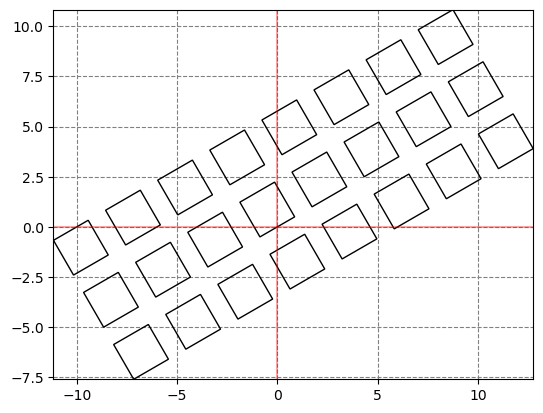

In [33]:
objects = *list(map(lambda x: plb.tr_translate(x,toy=-3),plb.gen_rectangle(8,-10,0,2,mezhdu=1))),*list(map(lambda x: plb.tr_translate(x,toy=3),plb.gen_rectangle(8,-10,0,2,mezhdu=1))),*plb.gen_rectangle(8,-10,0,2,mezhdu=1)
plb.draw_field(map(lambda x: plb.tr_rotate(x,30),objects))   

## 4.2

<Axes: >

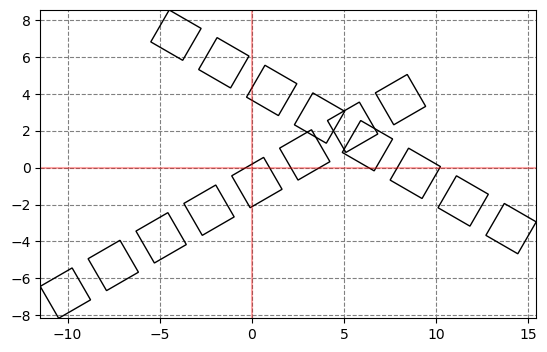

In [34]:
plb.draw_field(map(lambda x: plb.tr_rotate(x,30,(5,-5)),plb.gen_rectangle(8,-10,0,2,mezhdu=1)),map(lambda x: plb.tr_rotate(x,-30,(5,-5)),plb.gen_rectangle(8,-10,0,2,mezhdu=1)))

## 4.3

<Axes: >

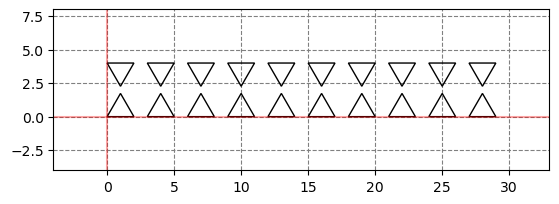

In [35]:
plb.draw_field(map(lambda x: plb.tr_symmetry(x,0,2),plb.gen_triangle(10,mezhdu=1)),plb.gen_triangle(10,mezhdu=1),enlarge=4)   

## 4.4

<Axes: >

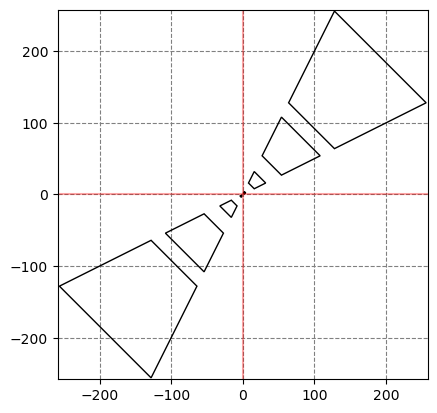

In [36]:
objec = [((2,1),(4,2),(2,4),(1,2))]
els = []
els.append(*objec)
for i in range(5):
    els.append(*map(lambda x: plb.tr_homothety(x,i**3),objec))
    els.append(*map(lambda x: plb.tr_homothety(x,-i**3),objec))
plb.draw_field(els,enlarge=2)

## 6.1

<Axes: >

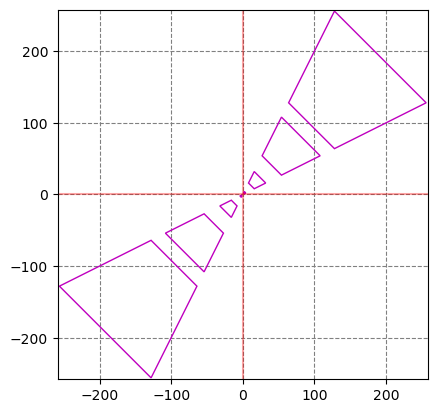

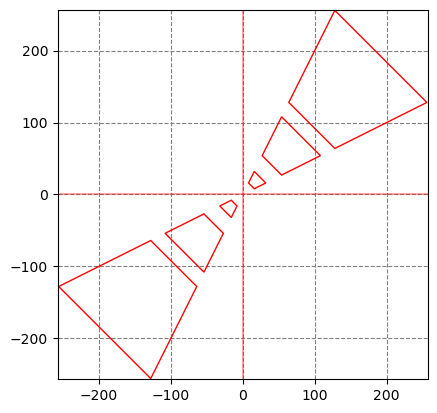

In [37]:
draw_square = pdec.flt_square(plb.draw_field,100)
plb.draw_field(els,ecolor='m',enlarge=2)
draw_square(els,ecolor='r',enlarge=1)

## 6.2

<Axes: >

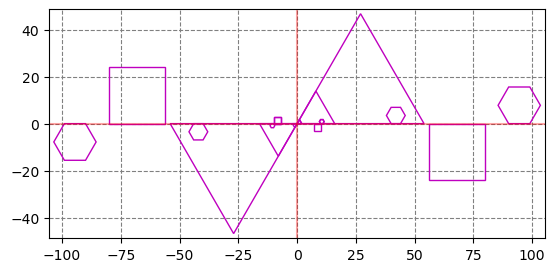

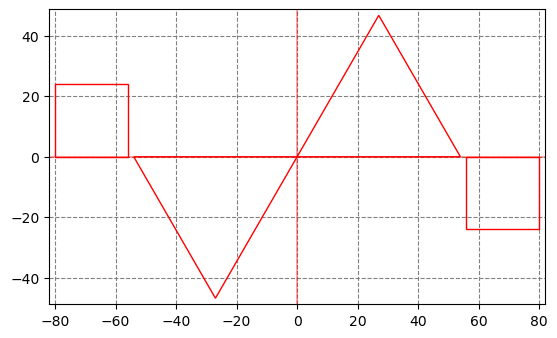

In [38]:
objec = plb.gen_triangle(1,0,0)
els = []
els.append(*objec)
for i in range(4):
    els.append(*map(lambda x: plb.tr_homothety(x,i**3),objec))
    els.append(*map(lambda x: plb.tr_homothety(x,-i**3),objec))
    
objec = plb.gen_rectangle(1,-10,0,3,3)
els.append(*objec)
for i in range(3):
    els.append(*map(lambda x: plb.tr_homothety(x,i**3),objec))
    els.append(*map(lambda x: plb.tr_homothety(x,-i**3),objec))
    
objec = plb.gen_hexagon(1,10,0,1)
els.append(*objec)
for i in range(4):
    els.append(*map(lambda x: plb.tr_homothety(x,i**2),objec))
    els.append(*map(lambda x: plb.tr_homothety(x,-i**2),objec))

# Создано 16 фигур различного размера и формы
plb.draw_field(els,ecolor = 'm', enlarge=2)

draw_shsi = pdec.flt_short_side(plb.draw_field,20)
draw_shsi(els,ecolor='r',enlarge=2)

## 6.3

<Axes: >

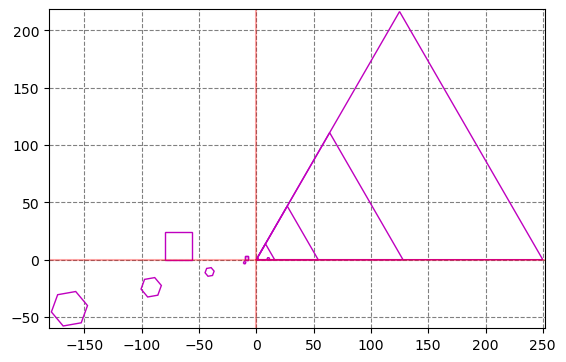

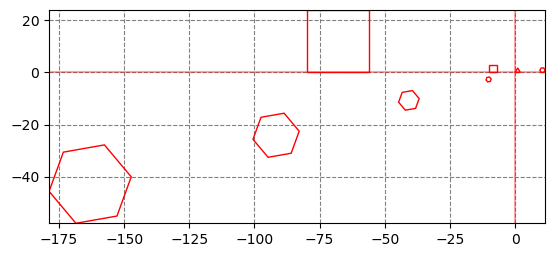

In [39]:
objec = plb.gen_triangle(1,0,0)
els = []
els.append(*objec)
for i in range(6):
    els.append(*map(lambda x: plb.tr_homothety(x,i**3),objec))
    #els.append(*map(lambda x: plb.tr_homothety(x,-i**3),objec))
    
objec = plb.gen_rectangle(1,-10,0,3,3)
els.append(*objec)
for i in range(3):
    els.append(*map(lambda x: plb.tr_homothety(x,i**3),objec))
    #els.append(*map(lambda x: plb.tr_homothety(x,-i**3),objec))
    
objec = plb.gen_hexagon(1,10,0,1)
els.append(*objec)

for i in range(5):
    els.append(*map(lambda x: plb.tr_rotate(plb.tr_homothety(x,i**2),190),objec))
    #els.append(*map(lambda x: plb.tr_rotate(plb.tr_homothety(x,-i**2),175),objec))
# Создано 16 фигур различного размера и формы
plb.draw_field(els,ecolor = 'm', enlarge=2)

sets=[]
for i in range(len(els)):
    sets.append(set(list(filter(lambda x:plb.flt_polygon_angles_inside(x,els[i]),els))))
    
plb.draw_field(list(reduce(lambda x,y: x&y, sets)),ecolor='r')